In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Customers.csv to Customers.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Customers.csv")

# Select appropriate features
features = df[["Annual Income (k$)", "Spending Score (1-100)"]]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Optional: Scale the features (improves performance)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means with 5 clusters (you can test different values later)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

# Add the cluster labels to the original data
df['Cluster'] = kmeans.labels_


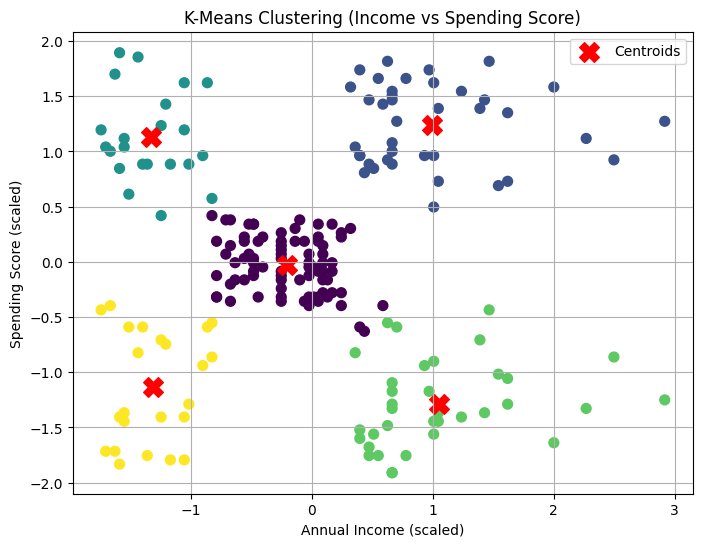

In [ ]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title("K-Means Clustering (Income vs Spending Score)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.grid(True)
plt.show()


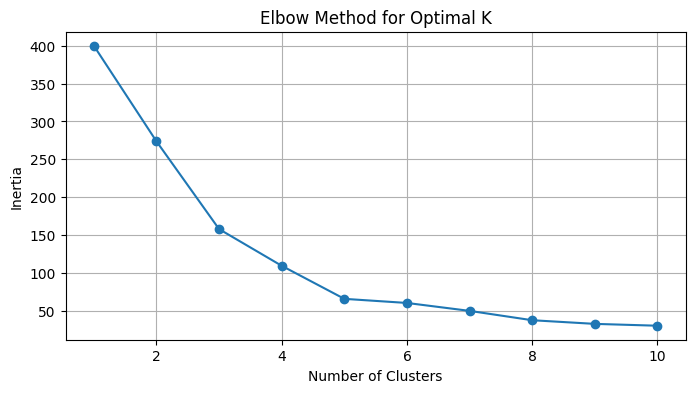

In [ ]:
# Try to find optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


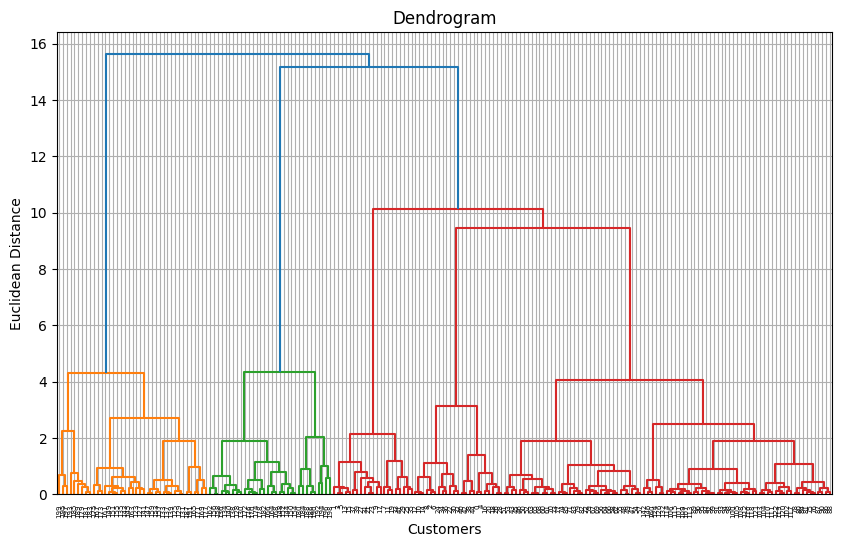

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Customers.csv")

# Select and scale the features
features = df[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create linkage matrix
linked = linkage(scaled_features, method='ward')  # 'ward' minimizes variance within clusters

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# No 'affinity' needed with linkage='ward'
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = agg.fit_predict(scaled_features)

# Add cluster labels to DataFrame
df['AgglomerativeCluster'] = labels


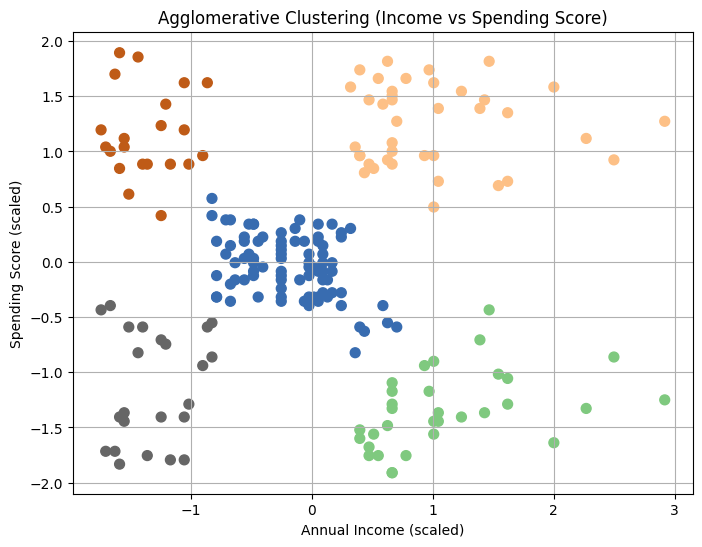

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, cmap='Accent', s=50)
plt.title("Agglomerative Clustering (Income vs Spending Score)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv("Customers.csv")

# Select numeric features only
features = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Apply variance threshold (e.g., 0.1)
selector = VarianceThreshold(threshold=0.1)
reduced_features = selector.fit_transform(scaled_features)

# Check which features are kept
selected_columns = features.columns[selector.get_support()]
print("Selected Features after Low-Variance Filter:", list(selected_columns))


Selected Features after Low-Variance Filter: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


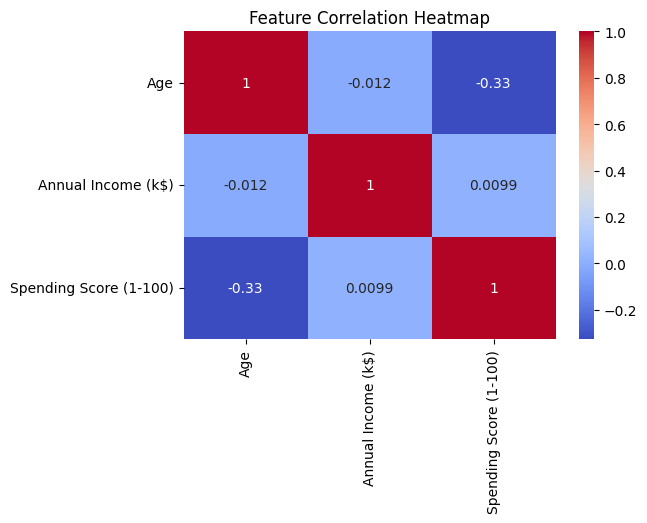

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame for correlation
corr_df = pd.DataFrame(scaled_features, columns=features.columns)

# Plot correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(reduced_features)

# Visualize if 2D
if reduced_features.shape[1] == 2:
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title("K-Means with Reduced Features")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_labels = agg.fit_predict(reduced_features)

# Visualize if 2D
if reduced_features.shape[1] == 2:
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=agg_labels, cmap='Accent', s=50)
    plt.title("Agglomerative Clustering with Reduced Features")
    plt.grid(True)
    plt.show()
